## Import packages

In [15]:
from IPython.display import display
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read data

Read the file **header.pkl** with pandas as DataFrame and the file **seismic_data_source_1000.nc** with xarray as DataSet

In [16]:
header = pd.read_pickle("header_new.pkl")
seismic_data= xr.open_dataset("seismic_data_source_1000.nc")
seismic_data

<xarray.Dataset>
Dimensions:  (twt: 4001, time: 4001, cdp: 1180)
Coordinates:
  * twt      (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp      (cdp) int32 871637 871638 871639 871640 ... 872814 872815 872816
Data variables:
    data     (cdp, time) float32 ...
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....

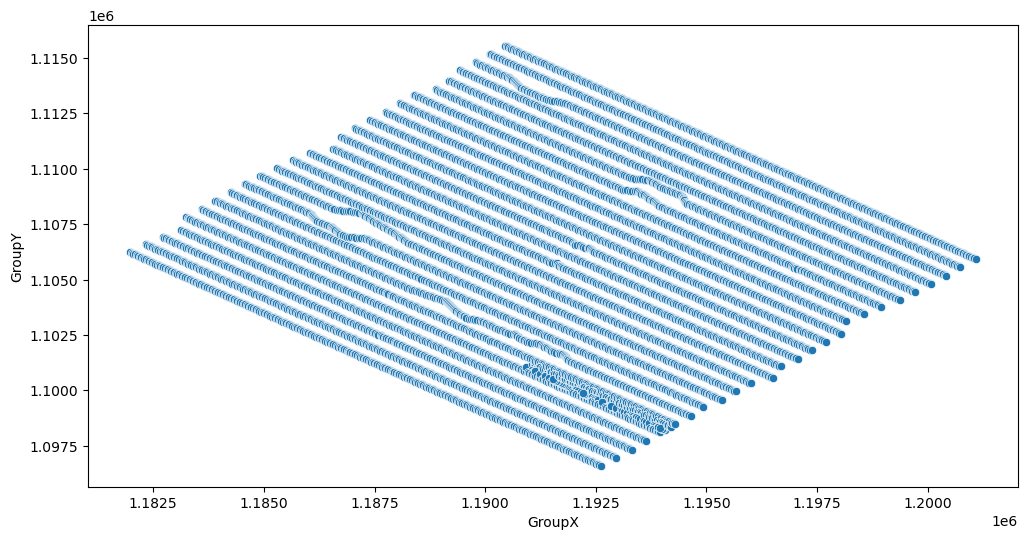

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceEnergyDirectionExponent,SourceMeasurementMantissa,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new
0,1,1,9,1,1,23,0,12,0,1,...,0,0,0,0,0,0,133195.117308,1.613410e+06,133695.147082,1.613429e+06
1,2,2,9,2,1,24,0,12,0,1,...,0,0,0,0,0,0,133243.281522,1.613410e+06,133695.147082,1.613429e+06
2,3,3,9,3,1,25,0,12,0,1,...,0,0,0,0,0,0,133290.704658,1.613410e+06,133695.147082,1.613429e+06
3,4,4,9,4,1,26,0,12,0,1,...,0,0,0,0,0,0,133338.868872,1.613411e+06,133695.147082,1.613429e+06
4,5,5,9,5,1,27,0,12,0,1,...,0,0,0,0,0,0,133386.292008,1.613411e+06,133695.147082,1.613429e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981934,8666679,2981935,3628,1916,2933,210725,0,12,0,1,...,0,0,0,0,0,0,147364.797755,1.626009e+06,144561.355938,1.625250e+06
2981935,8666680,2981936,3628,1917,2933,210726,0,12,0,1,...,0,0,0,0,0,0,147412.961969,1.626009e+06,144561.355938,1.625250e+06
2981936,8666681,2981937,3628,1918,2933,210727,0,12,0,1,...,0,0,0,0,0,0,147460.385105,1.626009e+06,144561.355938,1.625250e+06
2983819,8670862,2983820,3530,2084,2935,206392,0,12,0,1,...,0,0,0,0,0,0,147509.220738,1.626009e+06,144792.985494,1.624750e+06


In [17]:
rec_pos=header.drop_duplicates(subset=['GroupX','GroupY'])
sns.scatterplot(data=rec_pos, x="GroupX", y="GroupY")
plt.show()
rec_pos

## Create new dimensions
Compute **Azimuth** and **Offset** from sources and receivers positions.

In [18]:
pos_x=np.array(header['SourceX']-header['GroupX'], dtype='f')
pos_y=np.array(header['SourceY']-header['GroupY'], dtype='f')
azimuth=np.arctan2(-pos_x, pos_y) * 180 / np.pi+180
offset = np.linalg.norm([pos_x,pos_y], axis=0)  
header['Azimuth']=azimuth
header['Offset']=offset
header

,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceMeasurementExponent,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Offset
0,1,1,9,1,1,23,0,12,0,1,...,0,0,0,0,133195.117308,1.613410e+06,133695.147082,1.613429e+06,49.945190,500.372864
1,2,2,9,2,1,24,0,12,0,1,...,0,0,0,0,133243.281522,1.613410e+06,133695.147082,1.613429e+06,50.113312,452.226715
2,3,3,9,3,1,25,0,12,0,1,...,0,0,0,0,133290.704658,1.613410e+06,133695.147082,1.613429e+06,50.411865,404.855530
3,4,4,9,4,1,26,0,12,0,1,...,0,0,0,0,133338.868872,1.613411e+06,133695.147082,1.613429e+06,50.687988,356.723969
4,5,5,9,5,1,27,0,12,0,1,...,0,0,0,0,133386.292008,1.613411e+06,133695.147082,1.613429e+06,51.166656,309.381653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566873,10252258,3566874,3437,1204,3645,216988,0,12,0,1,...,0,0,0,0,147364.797755,1.626009e+06,147626.850767,1.625997e+06,45.154434,262.337555
3566874,10252259,3566875,3437,1205,3645,216989,0,12,0,1,...,0,0,0,0,147412.961969,1.626009e+06,147626.850767,1.625997e+06,44.432739,214.263855
3566875,10252260,3566876,3437,1206,3645,216990,0,12,0,1,...,0,0,0,0,147460.385105,1.626009e+06,147626.850767,1.625997e+06,43.543640,166.931122
3566876,10252261,3566877,3437,1207,3645,216991,0,12,0,1,...,0,0,0,0,147509.220738,1.626009e+06,147626.850767,1.625997e+06,41.915192,118.258194


Histogram of the **Azimuth** for the source 1000.

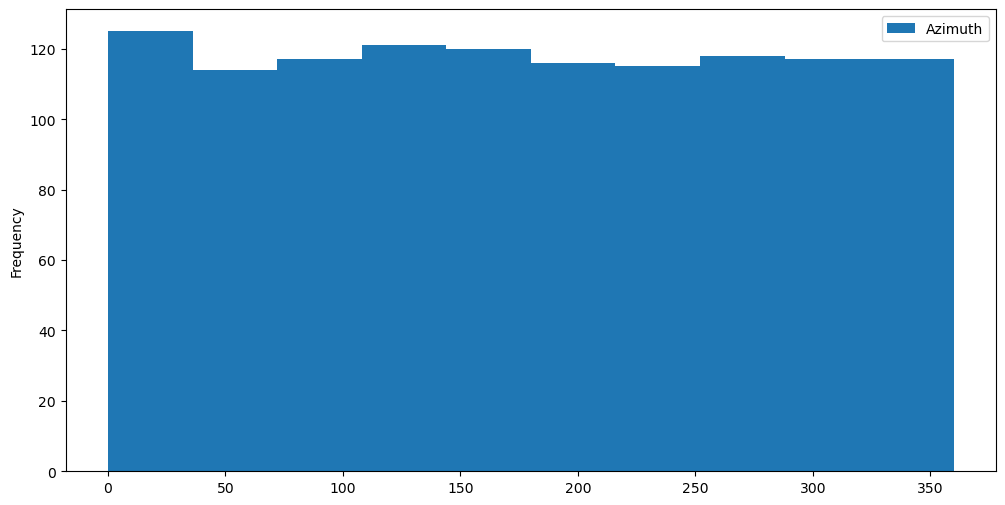

In [19]:
source=1000
shot_pos=header[header['EnergySourcePoint']==source]
shot_pos[['Azimuth']].plot.hist()
plt.show()

## Highligth position by azimuth bin
Show receivers fro the source 1000 with azimuth from 90 to 110.

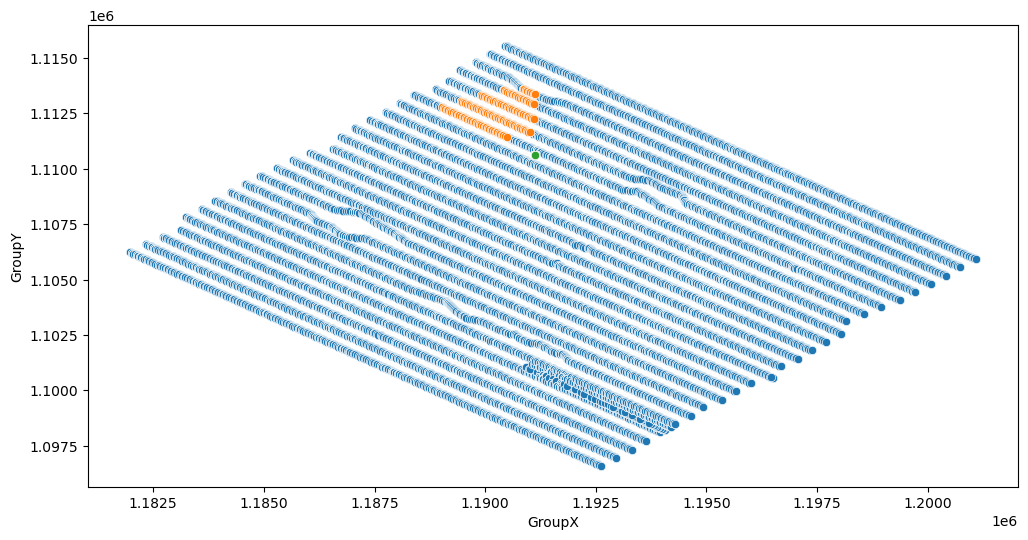

In [20]:
az_1=0
d_az=45
az_2=az_1+d_az                  #Limit values of azimuth
shot_azimuth_pos=shot_pos[(shot_pos['Azimuth']>az_1)&(shot_pos['Azimuth']<az_2)&(shot_pos['Offset']>1000)]
sns.scatterplot(data=header, x="GroupX", y="GroupY")
sns.scatterplot(data=shot_azimuth_pos, x="GroupX", y="GroupY")
sns.scatterplot(data=shot_azimuth_pos, x="SourceX", y="SourceY")
plt.show()

## Selecting traces for the azimuth bin
Create the azimuth coordinate for the DataSet **seismic_data**

In [21]:
import pickle
with open('inter_topo.pkl', 'rb') as f:
     rbf = pickle.load(f)
x_pts=shot_pos[['SourceX_new','ReceiverX']].to_numpy().astype('f')
y_pts=shot_pos[['SourceY_new','ReceiverY']].to_numpy().astype('f')
xt = np.transpose(np.linspace(x_pts[:,0],x_pts[:,1],10))
yt = np.transpose(np.linspace(y_pts[:,0],y_pts[:,1],10))
zt = rbf(xt,yt)
geodesic = np.sum(np.linalg.norm([np.diff(xt),np.diff(yt),np.diff(zt)], axis=0), axis=1)
shot_pos['Geodesic']=geodesic
shot_pos

/tmp/ipykernel_166684/3632952993.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shot_pos['Geodesic']=geodesic


,TRACE_SEQUENCE_LINE,TRACE_SEQUENCE_FILE,FieldRecord,TraceNumber,EnergySourcePoint,CDP,CDP_TRACE,TraceIdentificationCode,NSummedTraces,NStackedTraces,...,SourceMeasurementUnit,UnassignedInt1,UnassignedInt2,ReceiverX,ReceiverY,SourceX_new,SourceY_new,Azimuth,Offset,Geodesic
871637,2370881,871638,3225,290,1000,137174,0,12,0,1,...,0,0,0,136136.843809,1.619959e+06,137020.002344,1.622822e+06,120.681747,2996.459473,3112.522238
871638,2370882,871639,3225,291,1000,137175,0,12,0,1,...,0,0,0,136184.336604,1.619960e+06,137020.002344,1.622822e+06,121.547081,2981.657471,3083.321909
871639,2370883,871640,3225,292,1000,137176,0,12,0,1,...,0,0,0,136232.500818,1.619960e+06,137020.002344,1.622822e+06,122.437134,2968.078369,3059.462079
871640,2370884,871641,3225,293,1000,137177,0,12,0,1,...,0,0,0,136280.665033,1.619961e+06,137020.002344,1.622822e+06,123.335167,2955.221924,3041.965395
871641,2370885,871642,3225,294,1000,137178,0,12,0,1,...,0,0,0,136328.829247,1.619961e+06,137020.002344,1.622822e+06,124.240814,2943.097900,3026.308619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872812,2373481,872813,3225,2890,1000,184955,0,12,0,1,...,0,0,0,138135.597686,1.625503e+06,137020.002344,1.622822e+06,295.232635,2904.095947,2928.895944
872813,2373482,872814,3225,2891,1000,184956,0,12,0,1,...,0,0,0,138183.761900,1.625504e+06,137020.002344,1.622822e+06,294.364471,2923.354980,2949.059148
872814,2373483,872815,3225,2892,1000,184957,0,12,0,1,...,0,0,0,138231.856455,1.625503e+06,137020.002344,1.622822e+06,293.497772,2941.960693,2969.103499
872815,2373484,872816,3225,2893,1000,184958,0,12,0,1,...,0,0,0,138280.020669,1.625503e+06,137020.002344,1.622822e+06,292.652588,2962.539062,2990.309692


In [22]:
seismic_data["azimuth"] = ("azimuth",  shot_pos['Azimuth'])
seismic_data["geodesic"] = ("azimuth",  shot_pos['Geodesic'])
seismic_data["data"] = (("azimuth", "time"), np.array(seismic_data.data))
seismic_data

<xarray.Dataset>
Dimensions:   (twt: 4001, time: 4001, azimuth: 1180, cdp: 1180)
Coordinates:
  * twt       (twt) float64 0.0 2.0 4.0 6.0 ... 7.996e+03 7.998e+03 8e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * cdp       (cdp) int32 871637 871638 871639 871640 ... 872814 872815 872816
  * azimuth   (azimuth) float32 120.7 121.5 122.4 123.3 ... 293.5 292.7 291.8
Data variables:
    data      (azimuth, time) float32 26.84 25.84 23.84 ... 9.652 10.65 6.652
    geodesic  (azimuth) float64 3.113e+03 3.083e+03 ... 2.99e+03 3.011e+03
Attributes:
    sample_rate:         2.0
    text:                C 1 CLIENT                        COMPANY           ...
    measurement_system:  m
    source_file:         Niscota_4B.sgy
    percentiles:         [-8.89837605e+02 -8.00424402e+02 -1.07494686e+02  1....

Select DataArray **data_azimuth** from the DataSet **seimisc_data** in the azimuth bin.

In [23]:
data = seismic_data.where((seismic_data.azimuth>az_1)&(seismic_data.azimuth<az_2), drop=True)  #Select traces for the azimuth bin
data_azimuth = data.data.sortby('azimuth') #Sort DataArray by azimuth
data_azimuth

<xarray.DataArray 'data' (azimuth: 172, time: 4001)>
array([[   8.268419 ,   42.26625  ,   11.267327 , ...,   -9.732801 ,
         -34.73346  ,  -22.732422 ],
       [ -12.902    ,  -14.902716 ,  -16.903427 , ...,  -66.90686  ,
        -123.894775 ,  -93.90234  ],
       [  -8.404499 ,   -5.403797 ,   -9.404381 , ...,   -1.4045887,
          -9.404758 ,   -9.404297 ],
       ...,
       [   3.5471191,    8.54646  ,    2.546853 , ...,   -4.453453 ,
         -16.453186 ,  -20.453125 ],
       [   9.312627 ,   10.312306 ,   11.312465 , ...,  -15.687447 ,
         -18.687363 ,  -19.6875   ],
       [   3.000183 ,   10.000122 ,    6.999939 , ...,    3.999237 ,
          10.0007925,   10.       ]], dtype=float32)
Coordinates:
  * time     (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
  * azimuth  (azimuth) float32 0.1055 0.7275 0.8236 0.8548 ... 44.61 44.67 44.73

Plot the shot gather foe the azimuth bin sort by azimuth.

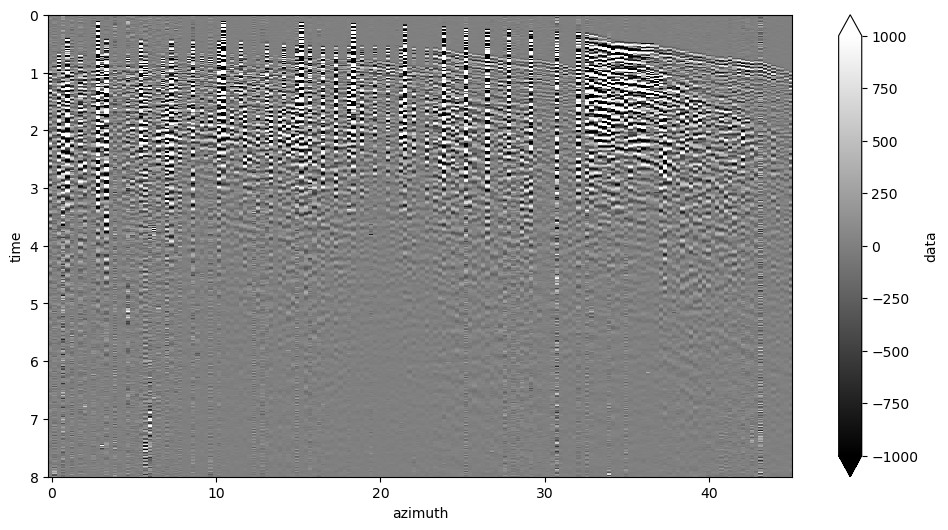

In [24]:
data_azimuth.plot.imshow('azimuth','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper')

## Sort the data by geodesic
Select DataArray **data_geodesic** from the DataSet **data** in the azimuth bin.

In [25]:
data=data.swap_dims({"azimuth": "geodesic"})
data_geodesic = data.data.sortby('geodesic') #Sort DataArray by offset
data_geodesic

<xarray.DataArray 'data' (geodesic: 172, time: 4001)>
array([[   1.9398584,   -9.699291 ,  -13.579008 , ...,   -1.867588 ,
          22.132538 ,  -14.8671875],
       [  -4.1482716,  -19.082047 ,  -17.422745 , ...,    4.547653 ,
          19.547073 ,   27.546875 ],
       [ -14.198862 ,  -15.1454525,    2.8397722, ...,   14.004418 ,
          17.00354  ,   10.003906 ],
       ...,
       [ -82.394455 ,  -21.397675 ,   23.604904 , ..., -219.40074  ,
        -182.39117  ,  -89.39453  ],
       [   9.312627 ,   10.312306 ,   11.312465 , ...,  -15.687447 ,
         -18.687363 ,  -19.6875   ],
       [   3.000183 ,   10.000122 ,    6.999939 , ...,    3.999237 ,
          10.0007925,   10.       ]], dtype=float32)
Coordinates:
  * geodesic  (geodesic) float64 231.3 269.5 316.5 ... 3.157e+03 3.196e+03
  * time      (time) float32 0.0 0.002 0.004 0.006 ... 7.994 7.996 7.998 8.0
    azimuth   (geodesic) float32 2.987 10.34 15.89 20.0 ... 5.571 44.67 44.73

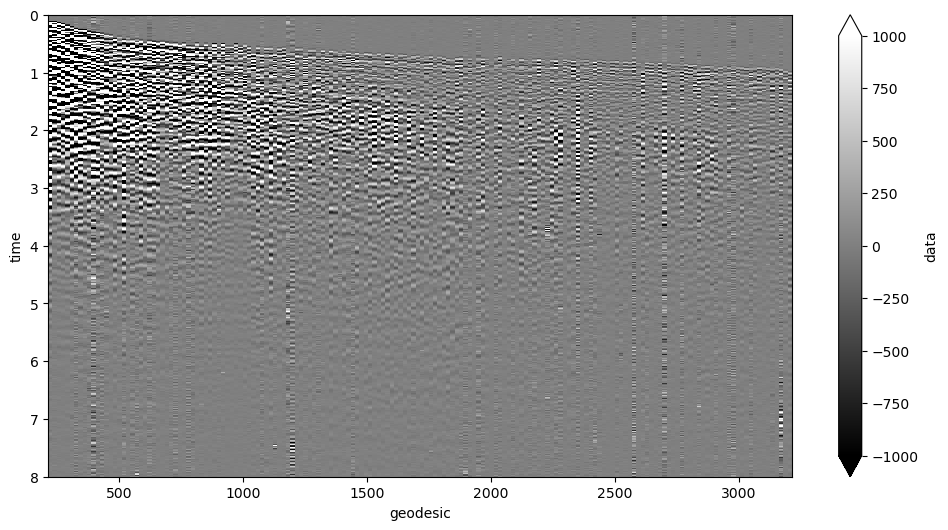

In [26]:
data_geodesic.plot.imshow('geodesic','time',cmap='gray', vmin=-1000, vmax=1000, origin='upper')

Plot the shot gather for the azimuth bin sort by offset.

Text(0, 0.5, 'Phase velocity (m/s)')

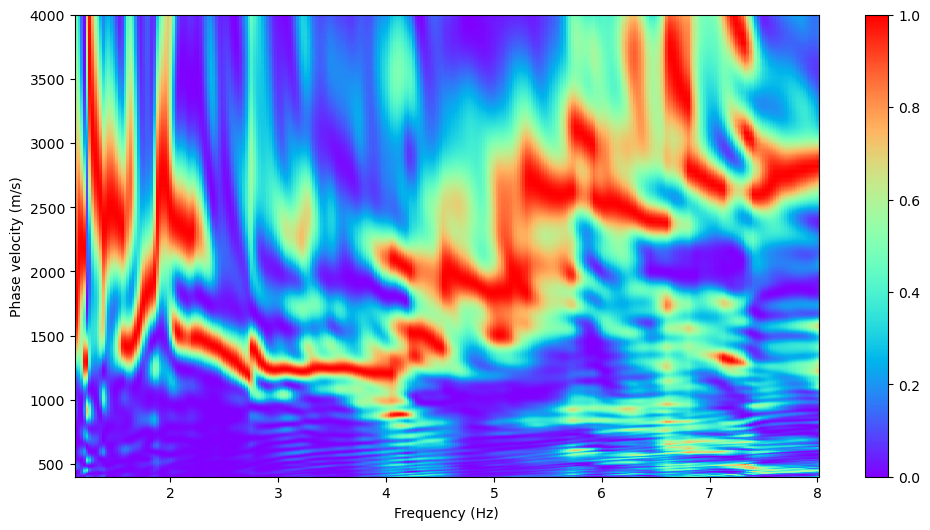

In [27]:
import masw_functions as mf
vmin=400.0 
vmax=4001.0
fmin=1.1
fmax=8.0
pstep=0.5e-5
Nf=20001
v=np.arange(vmin,vmax)
D=mf.DispersionSpectrum(data_geodesic,v,fmin,fmax,Nf,pstep)
plt.rcParams['figure.figsize'] = [12, 6]
D.plot.imshow(D.dims[1],D.dims[0],cmap='rainbow', origin='lower')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase velocity (m/s)")

/home/ivan/Documents/SW_Inversion_3D_Data/masw_functions.py:348: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ind = Xobs.groupby(['freq'])['amp'].transform(max) == Xobs['amp']


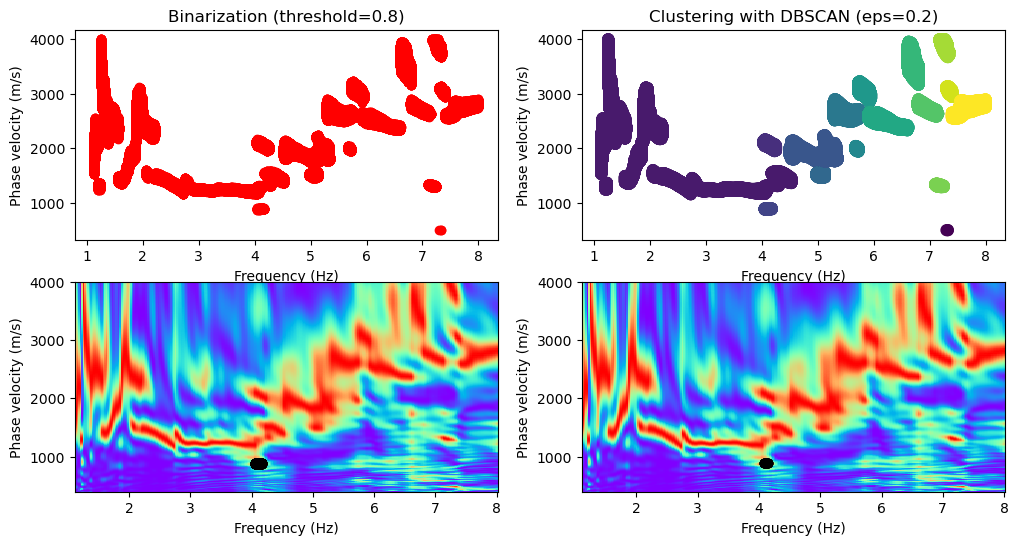

In [28]:
num=30
Xobs=mf.AutomaticPicking(D,threshold=0.9,eps=0.2,num=num,fig=True, reg=True,color='rainbow')

Text(0, 0.5, 'Depth (m)')

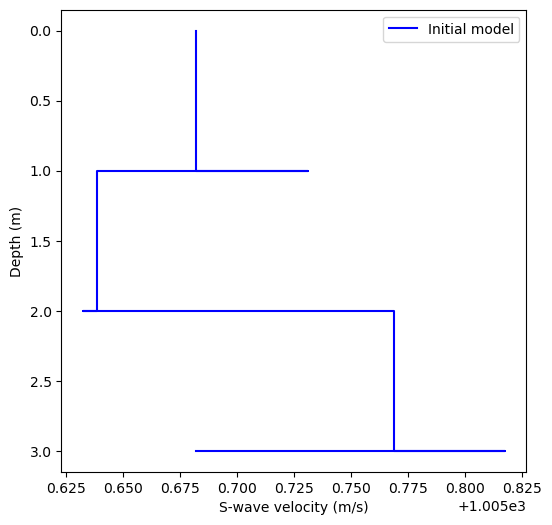

In [29]:
Nh=10
(vsia,hia,zia)=mf.InitialModel(Xobs,Nh)
plt.rcParams['figure.figsize'] = [6, 6]
plt.figure()
plt.step(np.append(vsia,vsia[-1]),zia,label='Initial model',color='blue')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("S-wave velocity (m/s)")
plt.ylabel("Depth (m)")

In [30]:
from scipy.interpolate import interp1d
ht = 40
vsz = interp1d(zia,np.append([0],vsia))
zi = np.arange(0,zia[-1],ht)
hi = np.diff(zi[1:])
vsi = vsz(zi[1:])
plt.figure()
plt.step(np.append(vsi,vsi[-1]),zi,label='Initial model',color='blue')
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("S-wave velocity (m/s)")
plt.ylabel("Depth (m)")

IndexError: index -1 is out of bounds for axis 0 with size 0

<Figure size 600x600 with 0 Axes>

  0%|          | 0/20 [00:00<?, ?it/s]

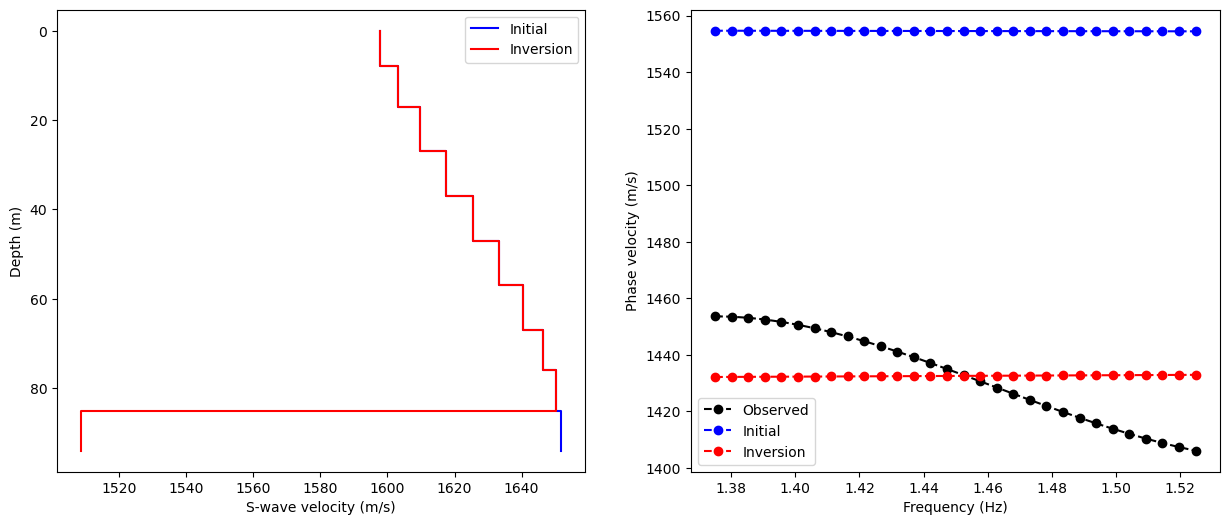

In [ ]:
rps=2.5
alpha=num
n_iter=20
rhoia=2*np.ones(np.size(vsia))
dh=10.0
hia=np.round(hia/dh)*dh
(vsfa,vpfa,e)=mf.sw_inversion(Xobs[:,1],Xobs[:,0],vsia,rhoia,hia,rps,n_iter,alpha,dh)

plt.rcParams['figure.figsize'] = [15, 6]
fig, axs = plt.subplots(1,2)
axs[0].step(np.append(vsia,vsia[-1]),zia, color='blue', label='Initial')
axs[0].step(np.append(vsfa,vsfa[-1]),zia, color='red', label='Inversion')
axs[0].set(xlabel='S-wave velocity (m/s)', ylabel='Depth (m)')
axs[0].legend()
axs[0].invert_yaxis()

cRia=mf.forward_dispersion(vsia,rps*vsia,rhoia,hia,Xobs[:,0])
cRfa=mf.forward_dispersion(vsfa,rps*vsfa,rhoia,hia,Xobs[:,0])
axs[1].plot(Xobs[:,0], Xobs[:,1], 'o--', color='black', label='Observed')
axs[1].plot(Xobs[:,0], cRia, 'o--', color='blue', label='Initial')
axs[1].plot(Xobs[:,0], cRfa, 'o--', color='red', label='Inversion')
axs[1].set(xlabel='Frequency (Hz)', ylabel='Phase velocity (m/s)')
axs[1].legend()

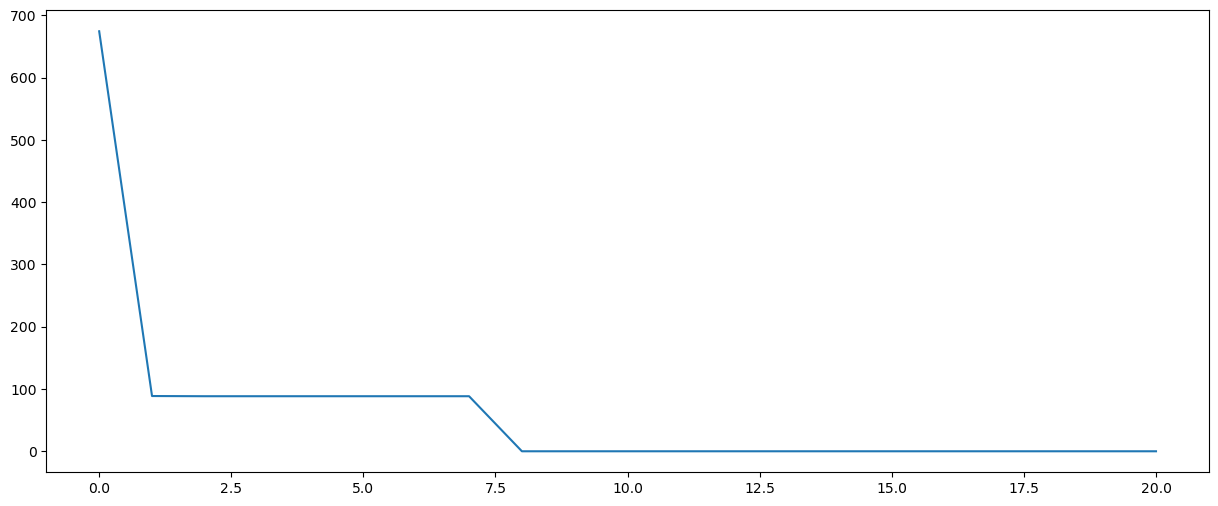

In [ ]:
plt.plot(e)

  0%|          | 0/20 [00:00<?, ?it/s]

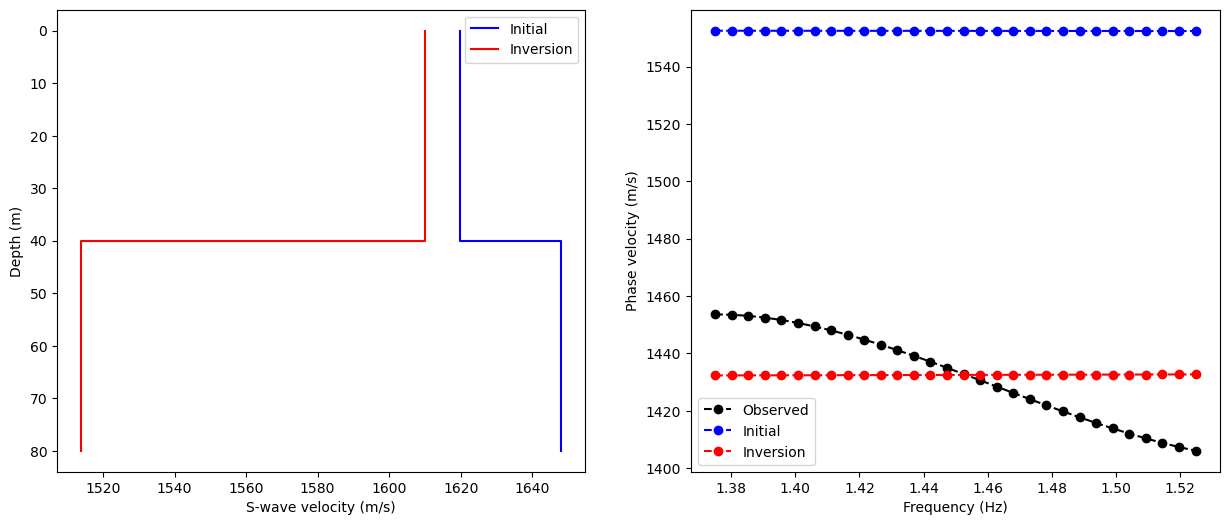

In [ ]:
rps=2.5
alpha=num
n_iter=20
rhoi=2*np.ones(np.size(vsi))
dh=10.0
(vsf,vpf,error)=mf.sw_inversion(Xobs[:,1],Xobs[:,0],vsi,rhoi,hi,rps,n_iter,alpha,dh)

plt.rcParams['figure.figsize'] = [15, 6]
fig, axs = plt.subplots(1,2)
axs[0].step(np.append(vsi,vsi[-1]),zi, color='blue', label='Initial')
axs[0].step(np.append(vsf,vsf[-1]),zi, color='red', label='Inversion')
axs[0].set(xlabel='S-wave velocity (m/s)', ylabel='Depth (m)')
axs[0].legend()
axs[0].invert_yaxis()

cRi=mf.forward_dispersion(vsi,rps*vsi,rhoi,hi,Xobs[:,0])
cRf=mf.forward_dispersion(vsf,rps*vsf,rhoi,hi,Xobs[:,0])
axs[1].plot(Xobs[:,0], Xobs[:,1], 'o--', color='black', label='Observed')
axs[1].plot(Xobs[:,0], cRi, 'o--', color='blue', label='Initial')
axs[1].plot(Xobs[:,0], cRf, 'o--', color='red', label='Inversion')
axs[1].set(xlabel='Frequency (Hz)', ylabel='Phase velocity (m/s)')
axs[1].legend()

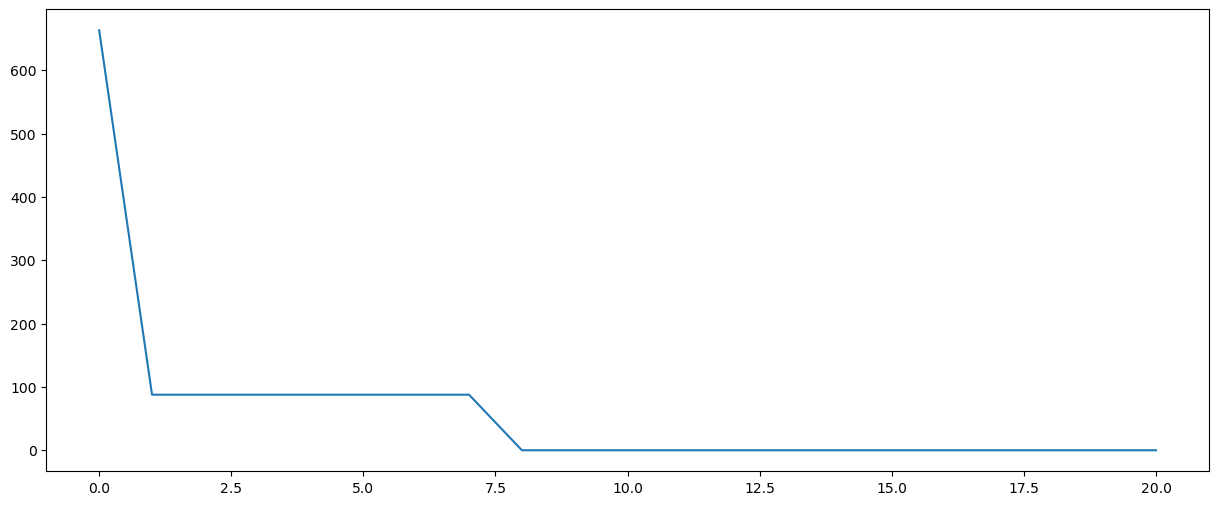

In [ ]:
plt.plot(error)